In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
weather =  pd.read_csv('data/weather_2012.csv',
                       parse_dates=['Date/Time'],
                      index_col='Date/Time')
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [5]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### columns renaming

In [13]:
len(weather.columns)

7

In [14]:
weather.columns

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [15]:
colnames = ['temp','dewpoint','rel_hum',
           'wind','visibility','pressure'
            ,'weather']
weather.columns=colnames # updates
weather.head()

,temp,dewpoint,rel_hum,wind,visibility,pressure,weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### boolean filter

In [18]:
weather.weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [31]:
#a simple boolean filter
is_snow = weather.weather.str.contains('Snow')

In [47]:
weather[is_snow].head()

,temp,dewpoint,rel_hum,wind,visibility,pressure,weather
Date/Time,,,,,,,
2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers


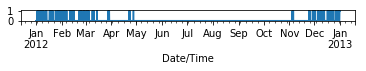

In [38]:

is_snow.astype(int).plot(figsize=(6,0.2))

In [42]:
warm_weather = weather[weather['temp'] >= 25].copy()

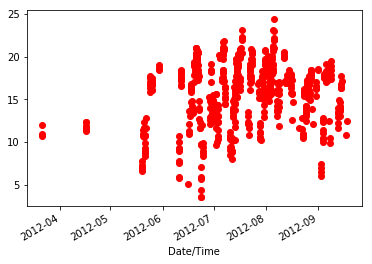

In [59]:
warm_weather['dewpoint'].plot(style='ro')

### resampling

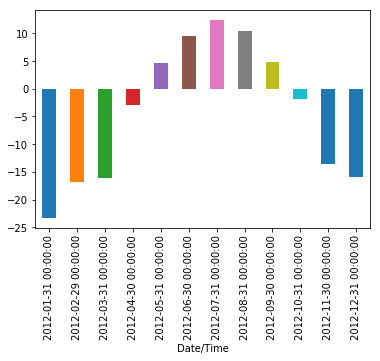

In [75]:
weather.temp.resample('M').min().plot(kind='bar')
plt.show()

### adding a column

In [94]:
def state(t):
    if t < 10:
        return "cold"
    elif t > 20:
        return "warm"
    else:
        return "nice"

In [98]:
weather_state = weather.temp.apply(state)

In [99]:
weather.loc[:,'state'] = weather_state

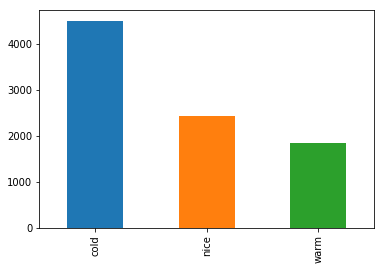

In [101]:
weather.state.value_counts().plot(kind='bar')